# Unified Comparison: Medical Text Classification Across Models and Embeddings

This notebook **consolidates results** from all four model notebooks:
- **02_Elyse_svm.ipynb** — SVM (LinearSVC) with TF-IDF, Word2Vec, GloVe, FastText
- **03_theodora_rnn.ipynb** — RNN (MLP for TF-IDF; sequence runs for W2V/GloVe/FastText)
- **fadh_lstm.ipynb** — LSTM with all four embeddings
- **04_egide_gru.ipynb** — GRU with all four embeddings

**Outputs:**
1. **Consolidated CSV** — `results/consolidated_final_results.csv` (all model–embedding combinations; report Table 2)
2. **Unified visualizations** — Accuracy and F1 bar charts, heatmaps, and summary plots for the report.
3. **Additional comparison tables** — Table 3 (best per model), Table 4 (by embedding), Table 5 (ranking), Table 6 (setup/methodology), Table 7 (extended metrics), Tables 8a–8d (per-model embedding ranking). CSVs saved in `results/` for copy-paste into the report.

## Setup and paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Run from project root or from notebooks/
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
os.makedirs("results", exist_ok=True)
os.makedirs("data", exist_ok=True)

RESULTS_DIR = "results"
DATA_DIR = "data"

## Consolidated results table

Values are taken from the individual notebooks (and the report Table 2). LSTM reports **macro F1**; other models report **weighted F1**. RNN sequence-embedding runs (Skip-gram, GloVe, FastText) failed in the current pipeline (~0.01 accuracy).

In [3]:
# Consolidated results from all notebooks (report Table 2)
rows = [
    {"Model": "SVM", "Embedding": "TF-IDF", "Accuracy": 0.9865, "F1_Score": 0.9865},
    {"Model": "SVM", "Embedding": "Skip-gram", "Accuracy": 0.8038, "F1_Score": 0.8020},
    {"Model": "SVM", "Embedding": "GloVe", "Accuracy": 0.9082, "F1_Score": 0.9072},
    {"Model": "SVM", "Embedding": "FastText", "Accuracy": 0.8395, "F1_Score": 0.8403},
    {"Model": "RNN", "Embedding": "TF-IDF", "Accuracy": 0.9867, "F1_Score": 0.9864},
    {"Model": "RNN", "Embedding": "Skip-gram", "Accuracy": 0.01, "F1_Score": 0.0},
    {"Model": "RNN", "Embedding": "GloVe", "Accuracy": 0.01, "F1_Score": 0.0},
    {"Model": "RNN", "Embedding": "FastText", "Accuracy": 0.01, "F1_Score": 0.0},
    {"Model": "LSTM", "Embedding": "TF-IDF", "Accuracy": 0.9850, "F1_Score": 0.9850},
    {"Model": "LSTM", "Embedding": "Skip-gram", "Accuracy": 0.9857, "F1_Score": 0.9857},
    {"Model": "LSTM", "Embedding": "GloVe", "Accuracy": 0.9851, "F1_Score": 0.9851},
    {"Model": "LSTM", "Embedding": "FastText", "Accuracy": 0.9837, "F1_Score": 0.9837},
    {"Model": "GRU", "Embedding": "TF-IDF", "Accuracy": 0.9878, "F1_Score": 0.9877},
    {"Model": "GRU", "Embedding": "Skip-gram", "Accuracy": 0.9788, "F1_Score": 0.9787},
    {"Model": "GRU", "Embedding": "GloVe", "Accuracy": 0.9861, "F1_Score": 0.9850},
    {"Model": "GRU", "Embedding": "FastText", "Accuracy": 0.9852, "F1_Score": 0.9850},
]

df = pd.DataFrame(rows)
df["Model_Embedding"] = df["Model"] + " + " + df["Embedding"]
order = ["TF-IDF", "Skip-gram", "GloVe", "FastText"]
df_plot = df.sort_values(["Model", "Embedding"]).copy()
df_plot["Embedding"] = pd.Categorical(df_plot["Embedding"], categories=order, ordered=True)
df_plot = df_plot.sort_values("Embedding")
model_colors = {"SVM": "#3498db", "RNN": "#e74c3c", "LSTM": "#9b59b6", "GRU": "#2ecc71"}
colors = [model_colors[m] for m in df_plot["Model"]]
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=model_colors[m], label=m) for m in ["SVM", "RNN", "LSTM", "GRU"]]
df

,Model,Embedding,Accuracy,F1_Score,Model_Embedding
0,SVM,TF-IDF,0.9865,0.9865,SVM + TF-IDF
1,SVM,Skip-gram,0.8038,0.8020,SVM + Skip-gram
2,SVM,GloVe,0.9082,0.9072,SVM + GloVe
3,SVM,FastText,0.8395,0.8403,SVM + FastText
4,RNN,TF-IDF,0.9867,0.9864,RNN + TF-IDF
5,RNN,Skip-gram,0.0100,0.0000,RNN + Skip-gram
6,RNN,GloVe,0.0100,0.0000,RNN + GloVe
7,RNN,FastText,0.0100,0.0000,RNN + FastText
8,LSTM,TF-IDF,0.9850,0.9850,LSTM + TF-IDF
9,LSTM,Skip-gram,0.9857,0.9857,LSTM + Skip-gram


## Save consolidated CSV

In [4]:
out_path = os.path.join(RESULTS_DIR, "consolidated_final_results.csv")
df[["Model", "Embedding", "Accuracy", "F1_Score"]].to_csv(out_path, index=False)
print(f"Saved: {out_path}")

Saved: results\consolidated_final_results.csv


## Additional comparison tables for report (Section 4.1 & 4.3)

The following tables support the rubric requirement for **multiple** experiment/comparison tables. Use **Table 3** and **Table 4** in Section 4.1 (after Table 2); **Table 5** for a ranked summary; **Table 6** in Section 4.3 (Critical comparison); **Table 7** in Section 4.1 if you add precision/recall from notebooks; **Tables 8a–8d** in Section 4.2 (one per model paragraph).

In [14]:
# Table 3 — Best configuration per model (report Section 4.1)
# One row per model: best embedding, accuracy, F1, notebook
best_per_model = df.loc[df.groupby("Model")["F1_Score"].idxmax()].reset_index(drop=True)
notebook_map = {"SVM": "02_Elyse_svm.ipynb", "RNN": "03_theodora_rnn.ipynb", "LSTM": "05_fadh_lstm.ipynb", "GRU": "04_egide_gru.ipynb"}
table3 = best_per_model[["Model", "Embedding", "Accuracy", "F1_Score"]].copy()
table3.columns = ["Model", "Best Embedding", "Accuracy", "F1"]
table3["Notebook"] = table3["Model"].map(notebook_map)
table3 = table3[["Model", "Best Embedding", "Accuracy", "F1", "Notebook"]]
print("Table 3 — Best configuration per model")
display(table3)
table3.to_csv(os.path.join(RESULTS_DIR, "table3_best_per_model.csv"), index=False)

Table 3 — Best configuration per model


,Model,Best Embedding,Accuracy,F1,Notebook
0,GRU,TF-IDF,0.9878,0.9877,04_egide_gru.ipynb
1,LSTM,Skip-gram,0.9857,0.9857,05_fadh_lstm.ipynb
2,RNN,TF-IDF,0.9867,0.9864,03_theodora_rnn.ipynb
3,SVM,TF-IDF,0.9865,0.9865,02_Elyse_svm.ipynb


In [16]:
# Table 4 — Comparison by embedding (report Section 4.1)
# Rows = embeddings; columns = best model, best accuracy, best F1, mean F1 (excluding failed RNN runs)
df_working = df[df["F1_Score"] > 0.1].copy()
by_emb_list = []
for emb in ["TF-IDF", "Skip-gram", "GloVe", "FastText"]:
    sub = df_working[df_working["Embedding"] == emb]
    idx = sub["F1_Score"].idxmax()
    row = sub.loc[idx]
    by_emb_list.append({
        "Embedding": emb,
        "Best Model": row["Model"],
        "Best Accuracy": round(row["Accuracy"], 4),
        "Best F1": round(row["F1_Score"], 4),
        "Mean F1": round(sub["F1_Score"].mean(), 4)
    })
table4 = pd.DataFrame(by_emb_list)
print("Table 4 — Comparison by embedding (across models)")
display(table4)
table4.to_csv(os.path.join(RESULTS_DIR, "table4_by_embedding.csv"), index=False)

Table 4 — Comparison by embedding (across models)


,Embedding,Best Model,Best Accuracy,Best F1,Mean F1
0,TF-IDF,GRU,0.9878,0.9877,0.9864
1,Skip-gram,LSTM,0.9857,0.9857,0.9221
2,GloVe,LSTM,0.9851,0.9851,0.9591
3,FastText,GRU,0.9852,0.9850,0.9363


In [18]:
# Table 5 — Ranking / top-k (report Section 4.1)
# Top 10 model–embedding pairs by F1 (excluding failed RNN sequence runs)
df_rank = df[df["F1_Score"] > 0.1].copy()
df_rank = df_rank.sort_values("F1_Score", ascending=False).reset_index(drop=True)
df_rank["Rank"] = range(1, len(df_rank) + 1)
table5 = df_rank[["Rank", "Model", "Embedding", "Accuracy", "F1_Score"]].head(10)
table5.columns = ["Rank", "Model", "Embedding", "Accuracy", "F1"]
print("Table 5 — Top 10 configurations by F1")
display(table5)
table5.to_csv(os.path.join(RESULTS_DIR, "table5_ranking.csv"), index=False)

Table 5 — Top 10 configurations by F1


,Rank,Model,Embedding,Accuracy,F1
0,1,GRU,TF-IDF,0.9878,0.9877
1,2,SVM,TF-IDF,0.9865,0.9865
2,3,RNN,TF-IDF,0.9867,0.9864
3,4,LSTM,Skip-gram,0.9857,0.9857
4,5,LSTM,GloVe,0.9851,0.9851
5,6,GRU,FastText,0.9852,0.9850
6,7,GRU,GloVe,0.9861,0.9850
7,8,LSTM,TF-IDF,0.9850,0.9850
8,9,LSTM,FastText,0.9837,0.9837
9,10,GRU,Skip-gram,0.9788,0.9787


In [19]:
# Table 6 — Setup / methodology comparison (report Section 4.3)
# From report: framework, max seq, vocab, epochs/tuning, F1 type per model
setup_rows = [
    {"Model": "SVM", "Framework": "scikit-learn", "Max seq length": "N/A (doc vector)", "Vocab size": "5000 (TF-IDF)", "Epochs / tuning": "CV for TF-IDF", "F1 type": "Weighted"},
    {"Model": "RNN", "Framework": "PyTorch", "Max seq length": "50", "Vocab size": "5000", "Epochs / tuning": "3 epochs, minimal grid", "F1 type": "Weighted"},
    {"Model": "LSTM", "Framework": "PyTorch", "Max seq length": "50", "Vocab size": "5000 / GloVe 100d", "Epochs / tuning": "10 epochs, grid", "F1 type": "Macro"},
    {"Model": "GRU", "Framework": "TensorFlow/Keras", "Max seq length": "50 (seq) or vocab (TF-IDF)", "Vocab size": "varies", "Epochs / tuning": "Fixed", "F1 type": "Weighted"},
]
table6 = pd.DataFrame(setup_rows)
print("Table 6 — Setup / methodology comparison (Section 4.3)")
display(table6)
table6.to_csv(os.path.join(RESULTS_DIR, "table6_setup_methodology.csv"), index=False)

Table 6 — Setup / methodology comparison (Section 4.3)


,Model,Framework,Max seq length,Vocab size,Epochs / tuning,F1 type
0,SVM,scikit-learn,N/A (doc vector),5000 (TF-IDF),CV for TF-IDF,Weighted
1,RNN,PyTorch,50,5000,"3 epochs, minimal grid",Weighted
2,LSTM,PyTorch,50,5000 / GloVe 100d,"10 epochs, grid",Macro
3,GRU,TensorFlow/Keras,50 (seq) or vocab (TF-IDF),varies,Fixed,Weighted


In [20]:
# Table 7 — Extended metrics (report Section 4.1)
# Same 16 rows as Table 2; Precision/Recall/Macro F1 not in consolidated CSV — add from notebooks if available
table7 = df[["Model", "Embedding", "Accuracy", "F1_Score"]].copy()
table7.columns = ["Model", "Embedding", "Accuracy", "F1 (Weighted/Macro)"]
# Optional columns (fill from individual notebooks if reported):
table7["Precision"] = ""
table7["Recall"] = ""
table7["Macro F1"] = ""
print("Table 7 — Extended metrics (fill Precision/Recall/Macro F1 from notebooks if available)")
display(table7)
table7.to_csv(os.path.join(RESULTS_DIR, "table7_extended_metrics.csv"), index=False)

Table 7 — Extended metrics (fill Precision/Recall/Macro F1 from notebooks if available)


,Model,Embedding,Accuracy,F1 (Weighted/Macro),Precision,Recall,Macro F1
0,SVM,TF-IDF,0.9865,0.9865,,,
1,SVM,Skip-gram,0.8038,0.8020,,,
2,SVM,GloVe,0.9082,0.9072,,,
3,SVM,FastText,0.8395,0.8403,,,
4,RNN,TF-IDF,0.9867,0.9864,,,
5,RNN,Skip-gram,0.0100,0.0000,,,
6,RNN,GloVe,0.0100,0.0000,,,
7,RNN,FastText,0.0100,0.0000,,,
8,LSTM,TF-IDF,0.9850,0.9850,,,
9,LSTM,Skip-gram,0.9857,0.9857,,,


In [21]:
# Tables 8a–8d — Per-model embedding ranking (report Section 4.2, one per model paragraph)
# For each model: Rank, Embedding, Accuracy, F1
for model in ["SVM", "RNN", "LSTM", "GRU"]:
    sub = df[df["Model"] == model][["Embedding", "Accuracy", "F1_Score"]].copy()
    sub = sub.sort_values("F1_Score", ascending=False).reset_index(drop=True)
    sub.insert(0, "Rank", range(1, len(sub) + 1))
    sub.columns = ["Rank", "Embedding", "Accuracy", "F1"]
    print(f"Table 8 — {model} embedding ranking")
    display(sub)
    sub.to_csv(os.path.join(RESULTS_DIR, f"table8_{model.lower()}_embedding_ranking.csv"), index=False)

Table 8 — SVM embedding ranking


,Rank,Embedding,Accuracy,F1
0,1,TF-IDF,0.9865,0.9865
1,2,GloVe,0.9082,0.9072
2,3,FastText,0.8395,0.8403
3,4,Skip-gram,0.8038,0.8020


Table 8 — RNN embedding ranking


,Rank,Embedding,Accuracy,F1
0,1,TF-IDF,0.9867,0.9864
1,2,Skip-gram,0.0100,0.0000
2,3,GloVe,0.0100,0.0000
3,4,FastText,0.0100,0.0000


Table 8 — LSTM embedding ranking


,Rank,Embedding,Accuracy,F1
0,1,Skip-gram,0.9857,0.9857
1,2,GloVe,0.9851,0.9851
2,3,TF-IDF,0.9850,0.9850
3,4,FastText,0.9837,0.9837


Table 8 — GRU embedding ranking


,Rank,Embedding,Accuracy,F1
0,1,TF-IDF,0.9878,0.9877
1,2,GloVe,0.9861,0.9850
2,3,FastText,0.9852,0.9850
3,4,Skip-gram,0.9788,0.9787


## 1. Bar chart: Accuracy by model and embedding (Figure 5 for report)

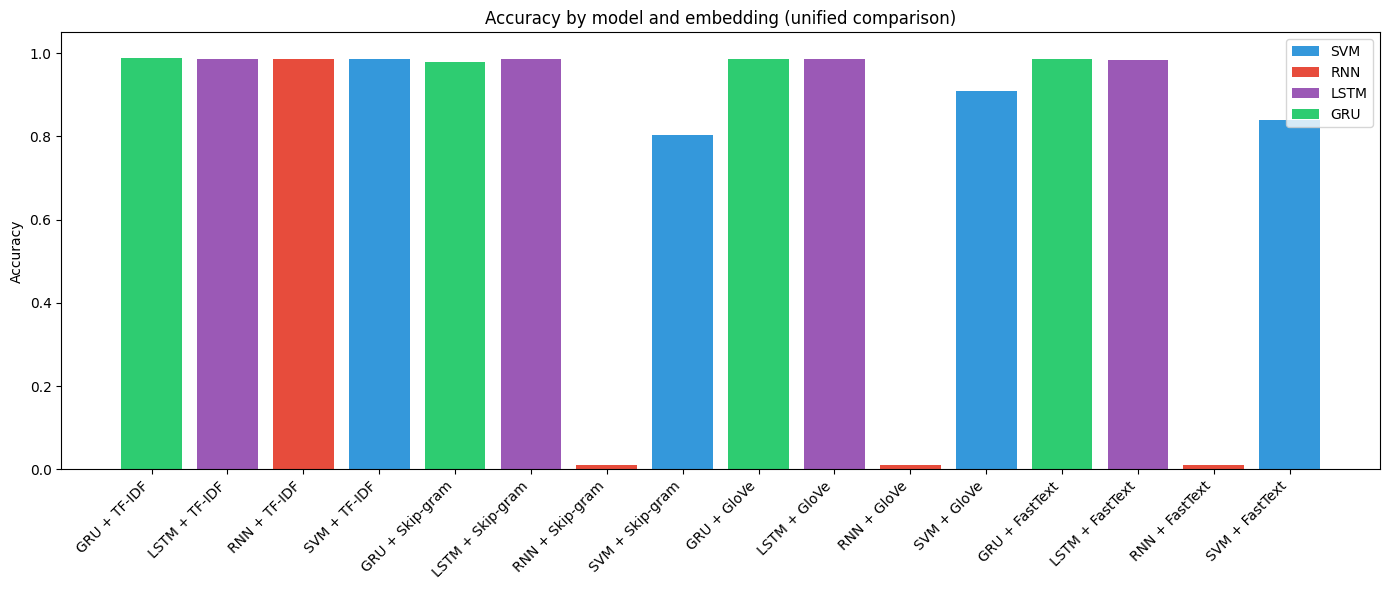

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(df_plot))
ax.bar(x, df_plot["Accuracy"], color=colors)
ax.set_xticks(x)
ax.set_xticklabels(df_plot["Model_Embedding"], rotation=45, ha="right")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy by model and embedding (unified comparison)")
ax.set_ylim(0, 1.05)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=model_colors[m], label=m) for m in ["SVM", "RNN", "LSTM", "GRU"]]
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "unified_accuracy_by_model_embedding.png"), dpi=150, bbox_inches="tight")
plt.show()

## 2. Bar chart: F1 by model and embedding (Figure 6 for report)

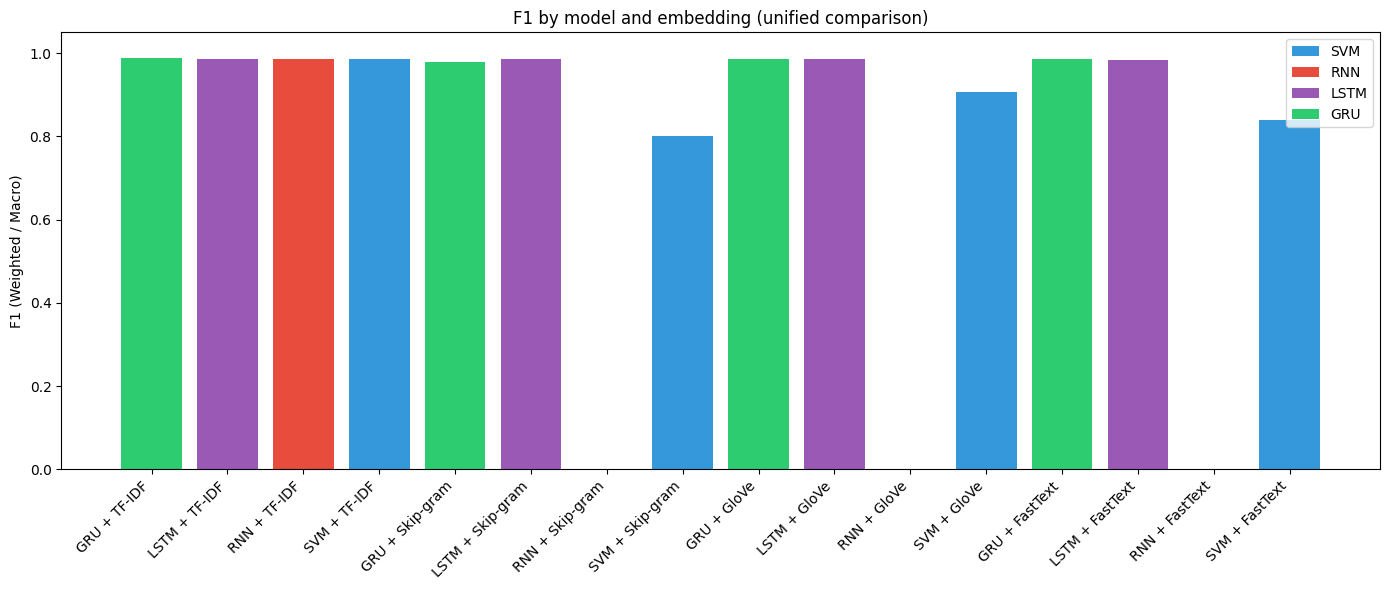

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(df_plot))
ax.bar(x, df_plot["F1_Score"], color=colors)
ax.set_xticks(x)
ax.set_xticklabels(df_plot["Model_Embedding"], rotation=45, ha="right")
ax.set_ylabel("F1 (Weighted / Macro)")
ax.set_title("F1 by model and embedding (unified comparison)")
ax.set_ylim(0, 1.05)
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "unified_f1_by_model_embedding.png"), dpi=150, bbox_inches="tight")
plt.show()

## 3. Heatmap: Accuracy (model × embedding)

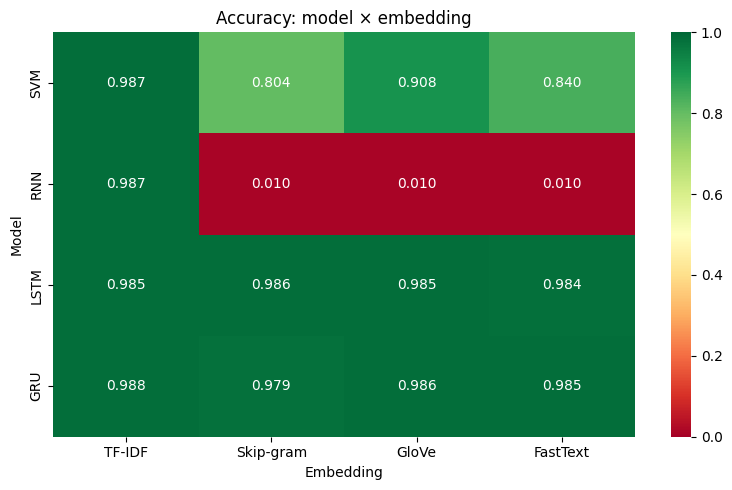

In [7]:
acc_pivot = df.pivot(index="Model", columns="Embedding", values="Accuracy")
acc_pivot = acc_pivot[["TF-IDF", "Skip-gram", "GloVe", "FastText"]]
acc_pivot = acc_pivot.reindex(["SVM", "RNN", "LSTM", "GRU"])
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc_pivot, annot=True, fmt=".3f", cmap="RdYlGn", vmin=0, vmax=1, ax=ax)
ax.set_title("Accuracy: model × embedding")
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "unified_heatmap_accuracy.png"), dpi=150, bbox_inches="tight")
plt.show()

## 4. Heatmap: F1 (model × embedding)

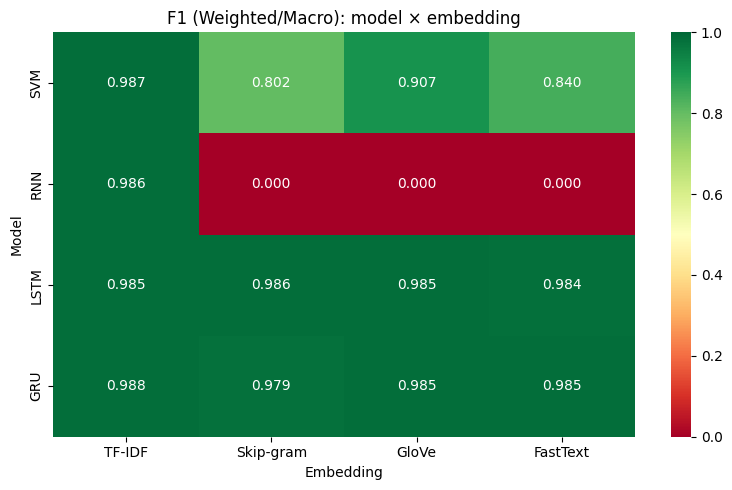

In [8]:
f1_pivot = df.pivot(index="Model", columns="Embedding", values="F1_Score")
f1_pivot = f1_pivot[["TF-IDF", "Skip-gram", "GloVe", "FastText"]]
f1_pivot = f1_pivot.reindex(["SVM", "RNN", "LSTM", "GRU"])
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(f1_pivot, annot=True, fmt=".3f", cmap="RdYlGn", vmin=0, vmax=1, ax=ax)
ax.set_title("F1 (Weighted/Macro): model × embedding")
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "unified_heatmap_f1.png"), dpi=150, bbox_inches="tight")
plt.show()

## 5. Best configuration per model

Best embedding per model (by F1):


,Model,Embedding,Accuracy,F1_Score
0,GRU,TF-IDF,0.9878,0.9877
1,LSTM,Skip-gram,0.9857,0.9857
2,RNN,TF-IDF,0.9867,0.9864
3,SVM,TF-IDF,0.9865,0.9865


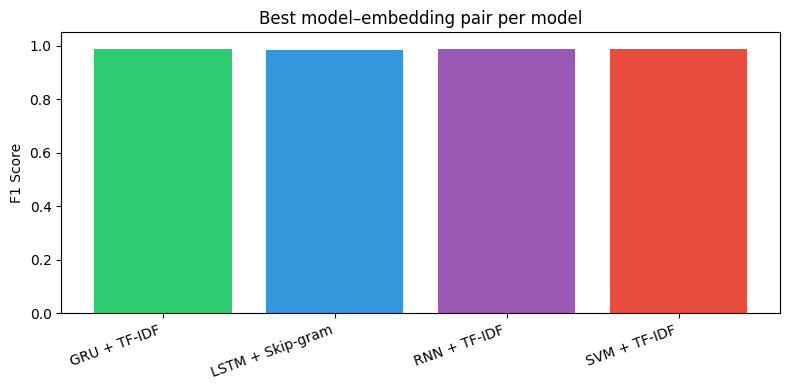

In [9]:
best_per_model = df.loc[df.groupby("Model")["F1_Score"].idxmax()][["Model", "Embedding", "Accuracy", "F1_Score"]].reset_index(drop=True)
print("Best embedding per model (by F1):")
display(best_per_model)

fig, ax = plt.subplots(figsize=(8, 4))
x = range(len(best_per_model))
ax.bar(x, best_per_model["F1_Score"], color=["#2ecc71", "#3498db", "#9b59b6", "#e74c3c"])
ax.set_xticks(x)
ax.set_xticklabels(best_per_model["Model"] + " + " + best_per_model["Embedding"])
ax.set_ylabel("F1 Score")
ax.set_title("Best model–embedding pair per model")
ax.set_ylim(0, 1.05)
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "unified_best_per_model.png"), dpi=150, bbox_inches="tight")
plt.show()

## 6. Best embedding per model (by accuracy)

In [10]:
best_acc = df.loc[df.groupby("Model")["Accuracy"].idxmax()][["Model", "Embedding", "Accuracy", "F1_Score"]].reset_index(drop=True)
print("Best embedding per model (by Accuracy):")
display(best_acc)

Best embedding per model (by Accuracy):


,Model,Embedding,Accuracy,F1_Score
0,GRU,TF-IDF,0.9878,0.9877
1,LSTM,Skip-gram,0.9857,0.9857
2,RNN,TF-IDF,0.9867,0.9864
3,SVM,TF-IDF,0.9865,0.9865


## 7. Summary: Overall best and patterns

For the report Discussion: TF-IDF is strongest for SVM and for RNN (MLP); GRU and LSTM achieve high scores across all embeddings when the pipeline is correct. RNN sequence runs (Skip-gram, GloVe, FastText) are excluded from pattern analysis due to pipeline failure.

In [13]:
# Exclude failed RNN sequence runs for "working" comparison
df_working = df[~((df["Model"] == "RNN") & (df["Embedding"] != "TF-IDF"))]
best_overall = df_working.loc[df_working["F1_Score"].idxmax()]
print("Best overall (working runs):", best_overall["Model"], "+", best_overall["Embedding"], 
      "— Accuracy:", round(best_overall["Accuracy"], 4), "F1:", round(best_overall["F1_Score"], 4))
print()
print("Mean Accuracy by embedding (working runs):")
print(df_working.groupby("Embedding")["Accuracy"].mean().round(4))
print()
print("Mean F1 by embedding (working runs):")
print(df_working.groupby("Embedding")["F1_Score"].mean().round(4))

Best overall (working runs): GRU + TF-IDF — Accuracy: 0.9878 F1: 0.9877

Mean Accuracy by embedding (working runs):
Embedding
FastText     0.9361
GloVe        0.9598
Skip-gram    0.9228
TF-IDF       0.9865
Name: Accuracy, dtype: float64

Mean F1 by embedding (working runs):
Embedding
FastText     0.9363
GloVe        0.9591
Skip-gram    0.9221
TF-IDF       0.9864
Name: F1_Score, dtype: float64
